# Example Data Analytics and Regression 
Created by FGL @ 04/03/2025 fglongatt@fglongatt.org

This Notebook reads, plots data, and creates a regression model.

This notebook requires a data file named: *Carbon_Intensity_Gen_Mix_2009-2025.csv*

The file contains 30-mins resolution data of the Carbon Intensity (grCO2/kWh) and Generation Mix in the Great Britain system from 2009-2025

Data ready to use can be downloaded from:

https://github.com/fglongatt/EPE_650_Energy_Engineering_Technology/blob/main/Carbon_Intensity_Data/Carbon_Intensity_Gen_Mix_2009-2025.zip

**NOTE:** The CSV file must be in the same folder as your Jupyter NoteBook

## Importing the appropriate packages

In [101]:
import pandas as pd
import numpy as np
from scipy import stats 
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the CSV file

In [103]:
file_name = 'Carbon_Intensity_Gen_Mix_2009-2025.csv'
df = pd.read_csv(file_name )
print(df.head())  # This function returns the first n rows for the object based on position. nint, default 5 

           DATETIME   GAS   COAL  NUCLEAR  WIND  HYDRO  IMPORTS  BIOMASS  \
0  01/01/2009 00:00  8378  15037     7099   293    246     2520        0   
1  01/01/2009 00:30  8510  15095     7087   270    245     2498        0   
2  01/01/2009 01:00  8484  15087     7074   243    246     2467        0   
3  01/01/2009 01:30  8328  15030     7064   225    246     2441        0   
4  01/01/2009 02:00  8303  14998     7052   208    246     2366        0   

   OTHER  SOLAR  ...  IMPORTS_perc  BIOMASS_perc  OTHER_perc  SOLAR_perc  \
0      0      0  ...           7.5           0.0         0.0         0.0   
1      0      0  ...           7.4           0.0         0.0         0.0   
2      0      0  ...           7.3           0.0         0.0         0.0   
3      0      0  ...           7.3           0.0         0.0         0.0   
4      0      0  ...           7.1           0.0         0.0         0.0   

   STORAGE_perc  GENERATION_perc  LOW_CARBON_perc  ZERO_CARBON_perc  \
0           0.0

## Creating individual dataframe for the specific data of Carbon Intensity, Wind Power and Gas Power

In [105]:
xtime = df['DATETIME']
print(xtime)
xtime = pd.to_datetime(df['DATETIME'], format="mixed")
xtime.dt.strftime('%d-%m-%Y %H:%M')
yIntensity=df['CARBON_INTENSITY']
yWind = df['WIND']
yGas= df['GAS']

0         01/01/2009 00:00
1         01/01/2009 00:30
2         01/01/2009 01:00
3         01/01/2009 01:30
4         01/01/2009 02:00
                ...       
280507    31/12/2024 21:30
280508    31/12/2024 22:00
280509    31/12/2024 22:30
280510    31/12/2024 23:00
280511    31/12/2024 23:30
Name: DATETIME, Length: 280512, dtype: object


## Plottig the time series

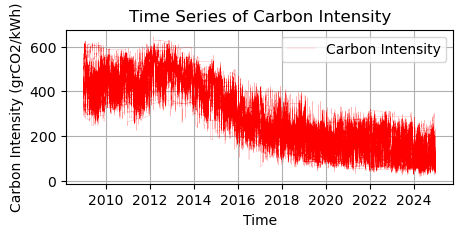

In [172]:
# Plot the time series
plt.figure(figsize=(5, 2))
plt.plot(xtime, yIntensity, label='Carbon Intensity',color='red',linewidth=0.1)
plt.xlabel('Time')
plt.ylabel('Carbon Intensity (grCO2/kWh)')
plt.title('Time Series of Carbon Intensity')
plt.legend()
plt.grid(True)
plt.show()

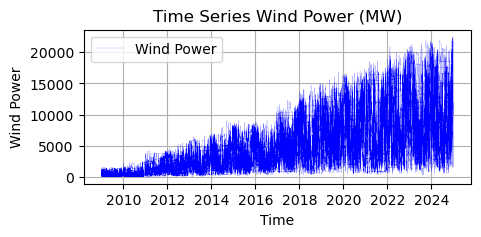

In [174]:
# Plot the time series
plt.figure(figsize=(5, 2))
plt.plot(xtime, yWind , label='Wind Power',color='blue',linewidth=0.1)
plt.xlabel('Time')
plt.ylabel('Wind Power')
plt.title('Time Series Wind Power (MW)')
plt.legend()
plt.grid(True)
plt.show()

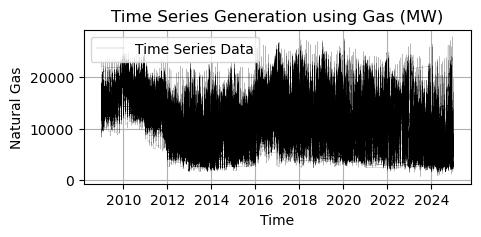

In [178]:
# Plot the time series
plt.figure(figsize=(5, 2))
plt.plot(xtime, yGas , label='Time Series Data',color='black',linewidth=0.1)
plt.xlabel('Time')
plt.ylabel('Natural Gas')
plt.title('Time Series Generation using Gas (MW)')
plt.legend()
plt.grid(True)
plt.show()

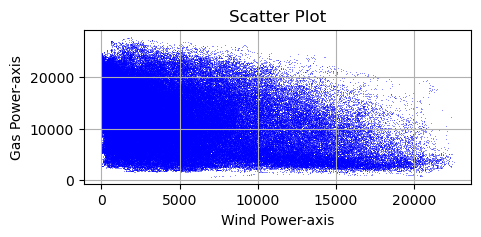

In [168]:
plt.figure(figsize=(5, 2))
plt.scatter(yWind, yGas, color='blue', marker='.',s=0.7, linewidths=0)
plt.xlabel('Wind Power-axis')
plt.ylabel('Gas Power-axis')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

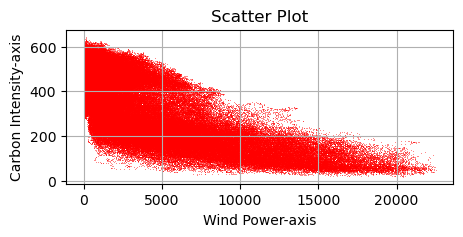

In [182]:
plt.figure(figsize=(5, 2))
plt.scatter(yWind, yIntensity, color='red', marker='.',s=0.7, linewidths=0)
plt.xlabel('Wind Power-axis')
plt.ylabel('Carbon Intensity-axis')
plt.title('Scatter Plot')
plt.grid(True)
plt.show()

In [112]:
# Calculate the correlation matrix
df2 = df.drop('DATETIME', axis =1)
correlation_matrix = df2.corr()
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       GAS      COAL   NUCLEAR      WIND     HYDRO   IMPORTS  \
GAS               1.000000  0.156716  0.100997 -0.401449  0.165255 -0.297211   
COAL              0.156716  1.000000  0.502282 -0.502341  0.129902 -0.453116   
NUCLEAR           0.100997  0.502282  1.000000 -0.469456  0.001551 -0.409904   
WIND             -0.401449 -0.502341 -0.469456  1.000000  0.212751  0.288289   
HYDRO             0.165255  0.129902  0.001551  0.212751  1.000000  0.086217   
IMPORTS          -0.297211 -0.453116 -0.409904  0.288289  0.086217  1.000000   
BIOMASS          -0.015998 -0.629760 -0.624739  0.495162  0.083250  0.420507   
OTHER            -0.017412 -0.053972  0.255562 -0.044999  0.129445  0.111118   
SOLAR            -0.006563 -0.309579 -0.210932  0.124932 -0.109594  0.274655   
STORAGE           0.434973  0.294689  0.137737 -0.111898  0.434145 -0.040261   
GENERATION        0.626104  0.569081  0.240167 -0.071432  0.445777 -0.188699   
CARBON_INTENSITY  0.

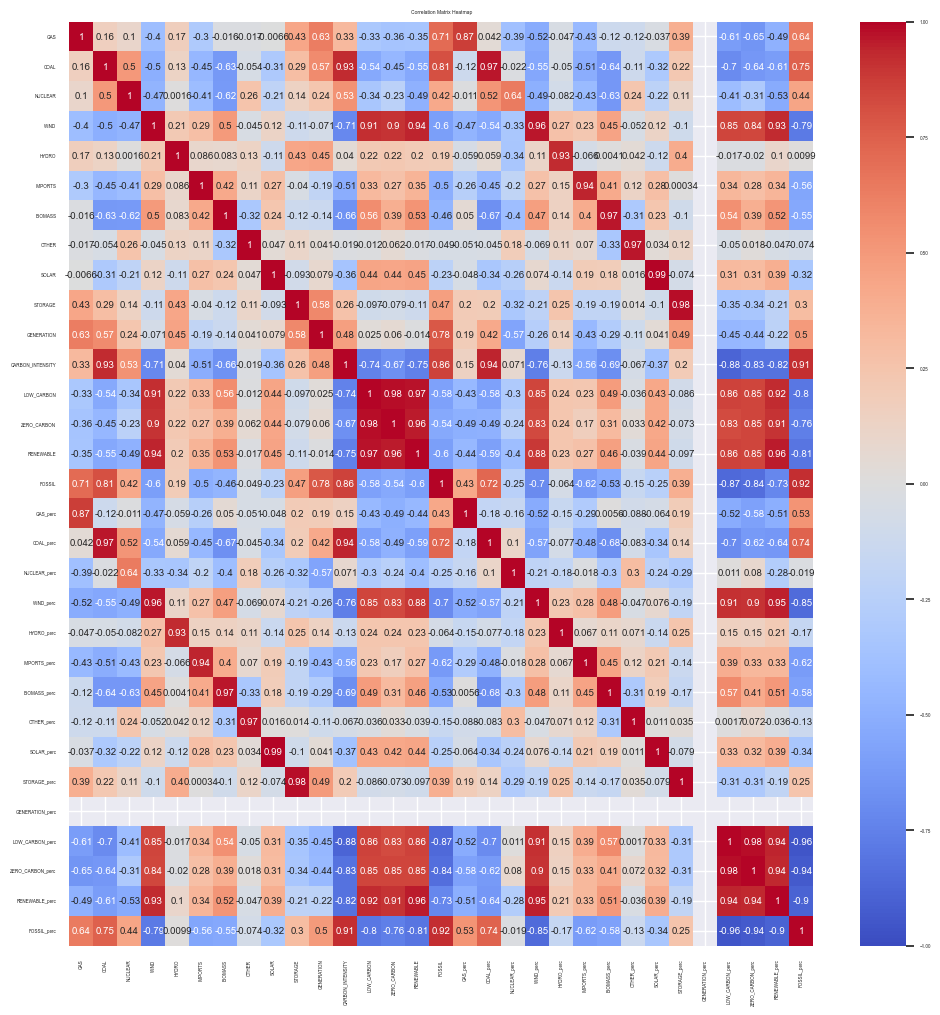

In [212]:
# Visualize the correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1,annot_kws={'size': 7})
plt.title('Correlation Matrix Heatmap')
plt.show()

In [210]:
My_df = pd.concat([yIntensity,yWind,yGas],axis=1)
# Calculate the correlation matrix
correlation_matrix2 = My_df.corr(method='pearson')
print("Correlation Matrix:")
print(correlation_matrix2)

Correlation Matrix:
                  CARBON_INTENSITY      WIND       GAS
CARBON_INTENSITY          1.000000 -0.712333  0.325862
WIND                     -0.712333  1.000000 -0.401449
GAS                       0.325862 -0.401449  1.000000


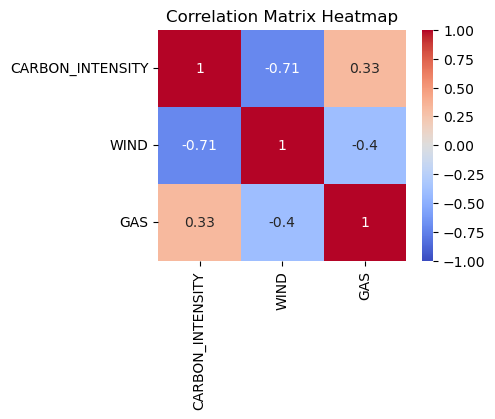

In [143]:
# Visualize MY correlation matrix
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Create a linear model to forecast the Carbon intensity (y) based on the Wind Power

In [117]:
from sklearn.linear_model import LinearRegression

Initialise the linear regresion model

In [119]:
model = LinearRegression()

In [120]:
X = np.array(df['CARBON_INTENSITY']).reshape(-1, 1) 
mean_value = np.nanmean(X)
X_filled = np.where(np.isnan(X), mean_value, X)
#---------------------------------------------------
Y = np.array(df['WIND']).reshape(-1, 1) 
mean_value = np.nanmean(Y)
Y_filled = np.where(np.isnan(Y), mean_value, Y)
#---------------------------------------------------
model.fit(X_filled,Y_filled)

LinearRegression()

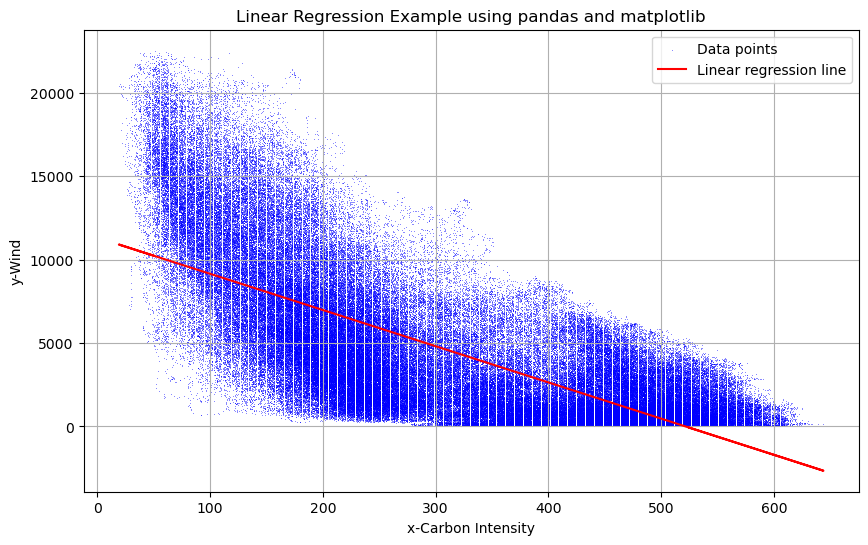

Intercept: [11311.44966106]
Coefficient: [-21.68302198]


In [166]:
# Predict y values based on the model
y_pred = model.predict(X_filled)

# Plot the data and the linear regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_filled, Y_filled, color='blue', label='Data points', marker='.',s=0.7, linewidths=0)
plt.plot(X_filled, y_pred, color='red', label='Linear regression line')
plt.xlabel('x-Carbon Intensity')
plt.ylabel('y-Wind')
plt.title('Linear Regression Example using pandas and matplotlib')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients
print(f'Intercept: {model.intercept_}')
print(f'Coefficient: {model.coef_[0]}')

## Calculating the Goodness-of-fit
A goodness-of-fit is a statistical test that tries to determine whether a set of observed values match those expected under the applicable model

In [150]:
# Calculate goodness of fit indicators
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2 = r2_score(Y_filled, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(df) - 1) / (len(df) - X_filled.shape[1]  - 1)
mae = mean_absolute_error(Y_filled, y_pred)
mse = mean_squared_error(Y_filled, y_pred)
rmse = np.sqrt(mse)
print(' ')
print(f'R-squared: {r2:.4f}')
print(f'Adjusted R-squared: {adjusted_r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')
print(f'Root Mean Squared Error: {rmse:.4f}')

 
R-squared: 0.5074
Adjusted R-squared: 0.5074
Mean Absolute Error: 2477.0763
Mean Squared Error: 9873577.2891
Root Mean Squared Error: 3142.2249


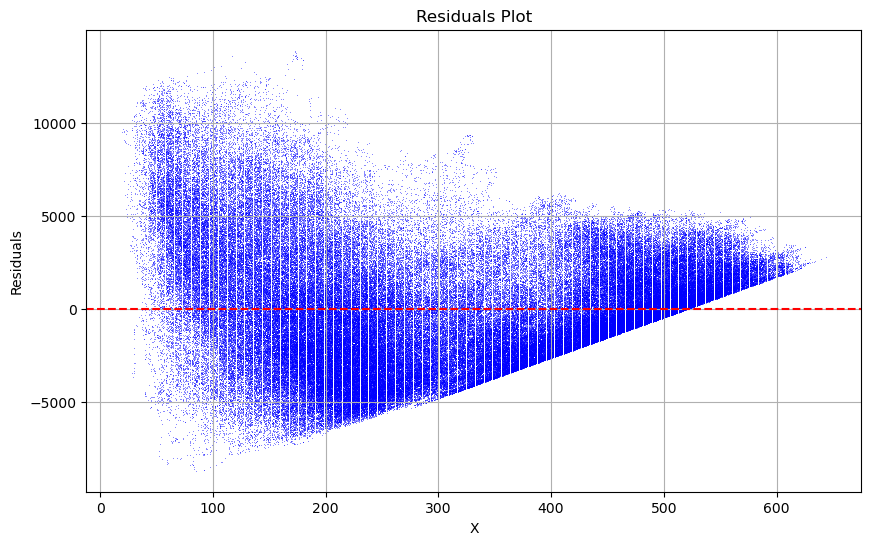

In [164]:
# Residuals Analysis
residuals = Y_filled - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(X_filled, residuals, color='blue',marker='.',s=0.7, linewidths=0)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()